In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### PSI Calculator

##### This code is used to calculate Population Stability Index given a base file, a target file and number of buckets 
The number of buckets needs to be divisor of 100, e.g. 5, 10, 20, 50, etc.

<img src="PSI.PNG">

In [2]:
def PSI_Calc(base_file, base_score, target_file, target_score, num_buckets):
    
    # Step1: Base
    base = [0]
    for i in range(1,num_buckets):
        base.append(np.percentile(base_file[base_score], (100/num_buckets)*i))
    
    # Step2: PSI Calculator
    target = []
    bucket = []
    for i in range(0,num_buckets):
        if i < num_buckets-1:
            target_i = (target_file[target_file[target_score] >= base[i]][target_score].count() - target_file[target_file[target_score] >= base[i+1]][target_score].count())/len(target_file)
        if i == num_buckets-1:
            target_i = target_file[target_file[target_score] >= base[i]][target_score].count()/len(target_file)
        target.append((target_i - 1/num_buckets)*np.log(target_i*num_buckets))
        bucket.append(target_i)
    PSI = sum(target)
    
    # Step3: Plot
    plt.figure(figsize=(10,3))   
    plt.bar(range(1,num_buckets+1), bucket)
    plt.axhline(1/num_buckets, color = 'r')
    plt.ylabel('Distribution of Population / Bucket')
    plt.xlabel('Bucket')
    
    return plt.title('PSI is ' + str(PSI))

##### Example

In [3]:
df_base = pd.DataFrame(abs(np.random.randn(100000)), columns = ['base_score'])
df_target = pd.DataFrame(abs(np.random.randn(200000)), columns = ['target_score'])

Text(0.5,1,'PSI is 0.0003800055176871064')

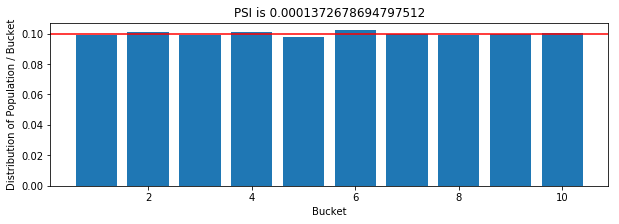

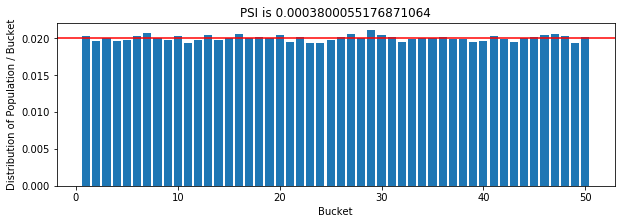

In [4]:
PSI_Calc(df_base, 'base_score', df_target, 'target_score', 10)
PSI_Calc(df_base, 'base_score', df_target, 'target_score', 50)